# BoosterRamp

Examples on how to use **<code>siriuspy.ramp.ramp.BooterRamp</code>** objects.

In [1]:
from siriuspy.ramp import ramp
from siriuspy.ramp import util


def delete_test_configs(r):
    _, metadata = r.configsrv_find()
    for m in metadata:
        if 'ipython-test' in m['name']:
            r.name = m['name']
            print('deleting config "{}"...'.format(r.name))
            r.configsrv_delete()

## Create a new configuration from scratch and delete it

### create and set value

In [9]:
# create booster ramp configuration object
r = ramp.BoosterRamp()
r.name = 'ipython-test' + r.name

In [10]:
# object is not synchronized yet with server since its configuration does now exists
print('synchronized: {}'.format(r.configsrv_synchronized))

# and also its config value is still invalid
print('valid value : {}'.format(r.check_value()))

synchronized: False
valid value : False


In [11]:
# a template dictionary for the configuration can be obtained:
t = r.get_config_type_template()

# set this updated template as configuration value
r.configuration = t

# print configuration field
print(r)

name                              : test2
delay_rf [us]                     : 0.0
ramp_dipole_delay [us]            : 0.0
ramp_dipole_duration [ms]         : 490.0
ramp_dipole_time_energy [ms] [GeV]: 
                                  : 0.122531 +0.030000
                                  : 12.743186 +0.078750
                                  : 303.875969 +3.101786
                                  : 315.638910 +3.150000
                                  : 323.480870 +3.150000
                                  : 335.243811 +3.000000
                                  : 470.517629 +0.210000
                                  : 490.000000 +0.030000
normalized_configs [ms] [name]    : 
                                  : 0.000000 ramp-start
                                  : 12.743186 rampup-start
                                  : 303.875969 rampup-stop



In [12]:
# the new configuration is still not valid because the normalized configs objects 
# are lot set yet:
print('valid value : {}'.format(r.check_value()))
print()

# get symbol to one normalized configuration object
n1 = r['rampup-start']

# print normalized configuration
print('configuration:')
print(n1)

valid value : False

configuration:
name: rampup-start


In [13]:
# but one can load normalized configurations from Config:
r.configsrv_load_normalized_configs()

# and now it becomes a valid configuration
print('valid value : {}'.format(r.check_value()))

valid value : True


### save configuration to server

In [14]:
# save current configuration to ConfigSrv
r.configsrv_save()

### list configurations stored in server

In [ ]:
# list all configurations in ConfigSrv:
_, metadata = r.configsrv_find()
print('number of configs: {}'.format(len(metadata)))
print()
for m in metadata:
    if m['name'] in ('test1', 'test2', 'ramp-start') or 'ipython-test' in m['name']:
        print(m['name'])
        print(m)
        print()
print('...')

### delete configurations

In [ ]:
# delete all configuration created in ipython
delete_test_configs(r)

## Loading an Existing Configuration and changing it

### Load

In [1]:
# creating object
r = ramp.BoosterRamp('test1')

# loading from ConfigSrv
r.configsrv_load()

# print configuration
print(r)

NameError: name 'ramp' is not defined

### Change and Update ConfigSrv

In [ ]:
# gets symbol to one of the normalized configurations
n1 = r['rampup-start']

# rename ramp configuration
r.name = 'ipython-test-test1'


# change its energy
n1['BO-Fam:MA-B'] = 0.20

# check validity
print('valid value : {}'.format(r.check_value()))

# save ramp config back to ConfigSrv with a different name
r.configsrv_save()

# list all ramp config in ConfigSrv
print('list with ramp configurations in ConfigServ:')
_, metadata = r.configsrv_find()
for m in metadata:
    print('-> {}'.format(m['name']))
    
# delete test configs
print()
delete_test_configs(r)

## Manipulating normalized Configurations

In [ ]:
from siriuspy.ramp import ramp
from siriuspy.ramp import util

r = ramp.BoosterRamp('test1')
r.configsrv_load()

# print previous config table
print('Normalized config table:')
print(r.normalized_configs)
print()

# insert new configs
name1 = r.normalized_configs_insert(0.20)
name2 = r.normalized_configs_insert(0.30)
name3 = r.normalized_configs_insert(0.25)

# print current config table
print('Normalized config table:')
print(r.normalized_configs)
print()

# print normalized configurations
n1 = r[name1]
n2 = r[name2]
n3 = r[name3]
c = n3.configuration
for k in c.keys():
    print('{:<12}: {:+.6f} {:+.6f} {:+.6f}'.format(k, n1[k], n3[k], n2[k]))


# check validity
print('valid value : {}'.format(r.check_value()))


# save configuration to ConfigServ


In [ ]:
(1.983122+3.000000)/2

In [ ]:
n1 = r['ramp-start']
n1 = r['rampup-start']
n1 = r['rampup-stop']
n1 = r['_ConfigSrv_2018-05-23-16:15:09.526']
n1.check_value()

## Manipulating waveforms

### Load existing ramp configuration

In [6]:
from siriuspy.ramp import ramp
from siriuspy.ramp import util
import matplotlib.pyplot as plt

# creating object
r = ramp.BoosterRamp('test1')

# loading from ConfigSrv
r.configsrv_load()

# print configuration
print(r)

name                              : test1
delay_rf [us]                     : 0.0
ramp_dipole_delay [us]            : 0.0
ramp_dipole_duration [ms]         : 490.0
ramp_dipole_time_energy [ms] [GeV]: 
                                  : 0.122531 +0.030000
                                  : 12.743186 +0.078750
                                  : 303.875969 +3.101786
                                  : 315.638910 +3.150000
                                  : 323.480870 +3.150000
                                  : 335.243811 +3.000000
                                  : 470.517629 +0.210000
                                  : 490.000000 +0.030000
normalized_configs [ms] [name]    : 
                                  : 0.000000 ramp-start
                                  : 12.743186 rampup-start
                                  : 303.875969 rampup-stop



In [7]:
w = r._create_waveform_dipole()

In [3]:
r.configsrv_load_normalized_configs()
print(r)

name: test1


In [6]:
w = r.get_waveform_currents('BO-Fam:MA-B')

In [8]:
print(w)


maname         : BO-Fam:MA-B
section        : BO
dipole_name    : None
family_name    : None
magfunc        : dipole
strength_label : Energy
strength_units : GeV
current_min    : 0.0
current_max    : 990.0


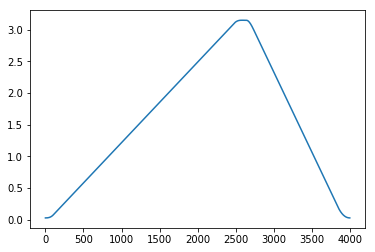

In [11]:
plt.plot(w.strengths)
plt.show()

In [8]:
r.configsrv_save()

In [ ]:
v2